<a href="https://colab.research.google.com/github/Je0azul5/IA-ML/blob/main/SimulatedAnnealingEnergyVsProba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importaciones de las bibliotecas matplotlib (permite la vizualizacion de las graficas), numpy (genera areglos), numpy.random(genera numero aleatrorios)

In [17]:
from matplotlib import pyplot as plt
import numpy as np
import numpy.random as rn

In [18]:
#Se genera un arreglo de 0 a 2000 con paso de 0.1 equivalen a 20000 numeros 

In [19]:
e = np.arange(0,2000,0.1)

Funcion de probabilidad en donde se obtiene estados de energio

In [20]:
## Parámetros: Energía - Temperatura. 
## Probabilidad de tener un estado con energía e.
def probabilidad(e, t):
    return np.exp(-e/t)

In [21]:
### Realizar las gráficas (t=5,t=100,t=800, t=500)
## Responder: Cuando es más probable que un estado tenga una energía alta.

La probailidad de tener mayor energia es cuando la temperatura es mas baja





Se  procede a graficar los valores correspondientes T=5

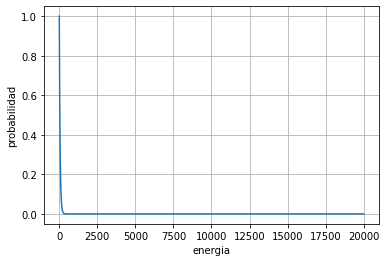

In [22]:
plt.plot(probabilidad(e,5))
plt.xlabel('energia')
plt.ylabel('probabilidad')
plt.grid()

Se  procede a graficar los valores correspondientes T=100

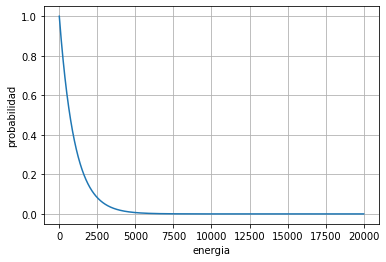

In [23]:
plt.plot(probabilidad(e,100))
plt.xlabel('energia')
plt.ylabel('probabilidad')
plt.grid()

Se  procede a graficar los valores correspondientes T=800

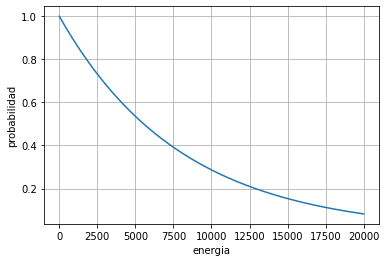

In [24]:
plt.plot(probabilidad(e,800))
plt.xlabel('energia')
plt.ylabel('probabilidad')
plt.grid()

Se  procede a graficar los valores correspondientes T=500

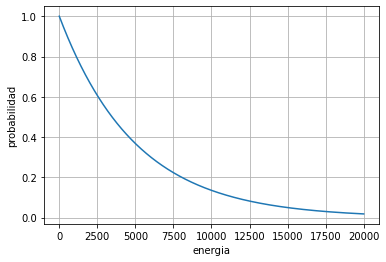

In [25]:
plt.plot(probabilidad(e,500))
plt.xlabel('energia')
plt.ylabel('probabilidad')
plt.grid()

# Parte 2: SA
minimizar 
$ f(x1,x2) = (x1^2 + x2^2 - 11)^2 + (x2^2 + x1 - 7)^2 $ 

Sujeto a $ x1 ≥ 0$ , $ x2 ≤ 5 $

Estado Inicial  (2.5, 2.5)

Utilizando SA

Se crea una clase estado en donde tendra los dos valores x1, x2

In [26]:
class Estado:
    x1 = 0
    x2 = 0
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
    def __str__(self):
        return "({}, {})".format(self.x1, self.x2)
    def __repr__(self):
        return self.__str__()

En las sigueintes dos funciones, se limitan los valores de x1 y x2 segun restriccion  x1 ≥ 0$ , $ x2 ≤ 5, 

In [27]:
#vamos a mover el nuevo x1 en pasos de delta 
#punto inicial (2.5  2.5) para general el nuevo x1, dos opciones 
#(2.4 2.5) (2.6 2.5)
def generar_nuevo_x1(x1_actual):
    nuevo_x1 = -1000
    while nuevo_x1 < 0:
        delta = 0.1 
        if rn.random() > 0.5: #probabilidad 50 %
            delta = -delta
        nuevo_x1 = x1_actual + delta
    return nuevo_x1


def generar_nuevo_x2(x2_actual):
    nuevo_x2 = 1000
    while nuevo_x2 > 5:
        delta = 0.1 
        if rn.random() > 0.5: #probabilidad 50 %
            delta = -delta
        nuevo_x2 = x2_actual + delta
    return nuevo_x2

Se genera el estado siguiente dependiendo la funcion, si el estado inicial es mayor que el nuevo estado, se tomara el nuevo estado, sino se quedara el estado actual

In [28]:
#una vez combinados los genrerar nuevo, tendrian el estado siguiente
#genrerar nuevo x1, generar nuevo x2, devolver
def generar_estado_siguiente(actual):
    nuevo_x1 = generar_nuevo_x1(actual.x1)
    nuevo_x2 = generar_nuevo_x2(actual.x2)
    estado = Estado(nuevo_x1, nuevo_x2)
    if funcionCosto(actual) < funcionCosto(estado):
      return actual   
    return estado

La funcion es: 
$ f(x1,x2) = (x1^2 + x2^2 - 11)^2 + (x2^2 + x1 - 7)^2 $ 



In [29]:
#lo anterior es evaluado en una función de costo
#evaluar a f(x1,x2), que queremos minimizar, asi sabremos el estado mejor o peor
def funcionCosto(estado):
  return (((estado.x1**2)+(estado.x2**2)-11)**2 +((estado.x2**2)+(estado.x1)-7)**2)
    

Esta funcion disminuye la temperatura por un factor 

In [30]:
def disminucion_temperatura(temp_actual, factor):
    return factor * temp_actual

En esta funcion a evaluar las funciones anteriores, conociendo la temperatura y evaluando con la funcion deltaE

In [31]:
def SA_alg(temp_inicial, estado_inicial, estado_nuevo,factor ):
    T = temp_inicial    ### por lo general es 1000, 2000
    actual = estado_inicial
    while T > 0.01:
        nuevo = estado_nuevo
        delta_e = funcionCosto(nuevo) - funcionCosto(actual)
        if delta_e < 0:   # minimizar la función
            actual = estado_nuevo
        elif rn.random() < probabilidad(delta_e, T):  ## Buscar que se acepte cn cierta probabilidad el estado peor
            ## La probabilidad va disminuir a medidad que T disminuye
            actual = nuevo
        T = disminucion_temperatura(T,factor)
        print(T)

Se introduce el estado inicial, x1=2.5,x2=2.5 y se genera un nuevo estado, y se define el factor de disminucion de temperatura en 0.7

In [32]:
print(generar_nuevo_x1(2.5))
print(generar_nuevo_x2(2.5))
estado1=Estado(2.5,2.5)
print(generar_estado_siguiente(estado1))
SA_alg(1000, estado1,generar_estado_siguiente(estado1) ,0.7)

2.6
2.4
(2.5, 2.5)
700.0
489.99999999999994
342.99999999999994
240.09999999999994
168.06999999999994
117.64899999999994
82.35429999999995
57.648009999999964
40.353606999999975
28.24752489999998
19.773267429999986
13.84128720099999
9.688901040699992
6.782230728489994
4.7475615099429955
3.3232930569600967
2.3263051398720673
1.628413597910447
1.1398895185373128
0.7979226629761189
0.5585458640832832
0.3909821048582982
0.27368747340080873
0.1915812313805661
0.13410686196639626
0.09387480337647738
0.06571236236353416
0.045998653654473906
0.03219905755813173
0.02253934029069221
0.015777538203484546
0.011044276742439182
0.007730993719707427
